<a href="https://colab.research.google.com/github/bilnazir/MLNN_Project_Group1/blob/main/ML_Project_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.backend import conv2d
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Group_Project_Data_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: Group_Project_Data/Train/Fake/img_2189.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2189.png  
  inflating: Group_Project_Data/Train/Fake/img_460.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_460.png  
  inflating: Group_Project_Data/Train/Fake/img_1480.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1480.png  
  inflating: Group_Project_Data/Train/Fake/img_1494.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_1494.png  
  inflating: Group_Project_Data/Train/Fake/img_474.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_474.png  
  inflating: Group_Project_Data/Train/Fake/img_312.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_312.png  
  inflating: Group_Project_Data/Train/Fake/img_2823.png  
  inflating: __MACOSX/Group_Project_Data/Train/Fake/._img_2823.png  
  inflating: Group_Project_Data/Train/Fake/img_1319.png  
  inflat

In [4]:
# Define the image directory path
image_dir_train = "Group_Project_Data/Train"
image_dir_valid = "Group_Project_Data/Valid"

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Create the dataset using the image directory path
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=image_dir_train,
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=image_dir_valid,
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123,
)

# Print the class names
class_names = train_dataset.class_names
print(class_names)

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
['Fake', 'Real']


In [5]:
# Load the training data into x_train and y_train variables
x_train = []
y_train = []
for images, labels in train_dataset:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Load the validation data into x_val and y_val variables
x_val = []
y_val = []
for images, labels in val_dataset:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())

x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [6]:
# Rescale the pixel values
x_train = x_train/255.
x_val = x_val/255.

In [7]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size[0], img_size[1], 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10, batch_size=128)
print(history.history.keys)

Epoch 1/10
188/188 [==============================] - 25s 59ms/step - loss: 0.0871 - accuracy: 0.9620 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 2/10
188/188 [==============================] - 11s 56ms/step - loss: 0.0143 - accuracy: 0.9948 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 3/10
188/188 [==============================] - 10s 51ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0140 - val_accuracy: 0.9970
Epoch 4/10
188/188 [==============================] - 10s 52ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0018 - val_accuracy: 0.9985
Epoch 5/10
188/188 [==============================] - 8s 44ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 10s 52ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0150 - val_accuracy: 0.9985
Epoch 7/10
188/188 [==============================] - 10s 51ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 

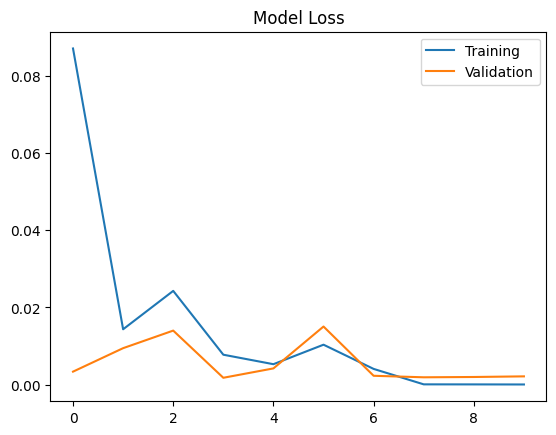

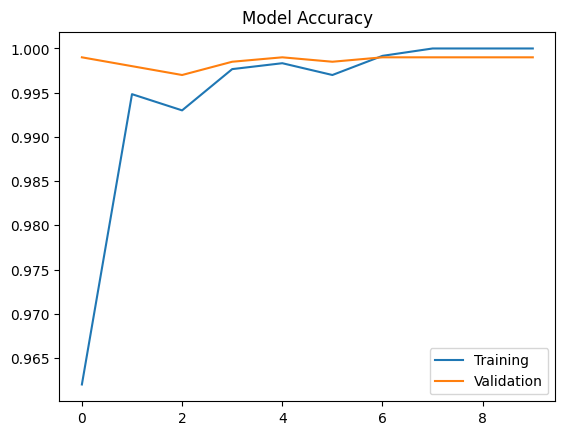

63/63 [==============================] - 1s 20ms/step
['Fake', 'Real']


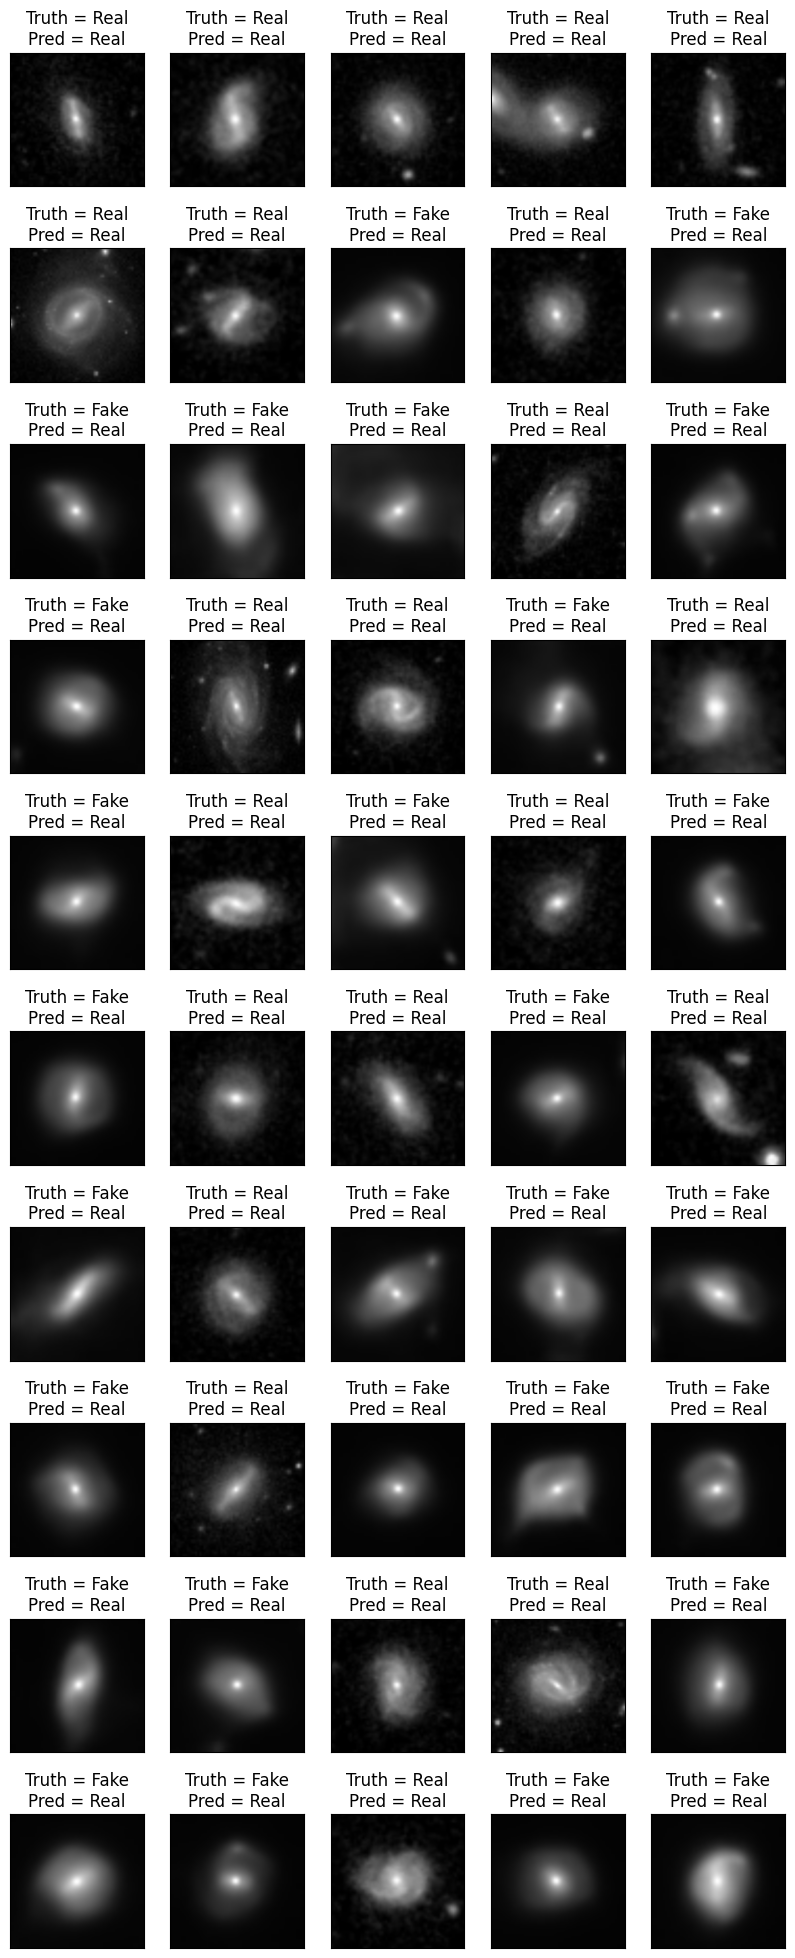

In [9]:
# Plot for Model Loss
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

# Plot for Model Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

# Testing the model to predict 
y_pred = model.predict(x_val)
y_pred_label = np.argmax(y_pred, axis=1)

# Plotting images with labels telling the truth and predicted values with some 
# testing images for each class
f, ax = plt.subplots(10,5, figsize=(10, 25))
ax = ax.flatten()

print(class_names)
# Looping the selected images from each class to show on the plot
for i in range(50):
    ax[i].imshow(x_val[i])
    ax[i].set_title(f'Truth = {class_names[np.argmax(y_val[i])]}\nPred = {class_names[y_pred_label[i]]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()


In [10]:
# Saving your model
model.save('/content/Group_X_Model_Trained')

In [11]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/Group_X_Model_Trained')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1